## Sparse Matrices

In [1]:
from IPython.display import display, Markdown

Special routine for sparse matrices in python  are in the modulus scipy.sparse. The main storages schemes are the compressed sparse row (csr) and compresses sparse column (csc).
Let us write a small matrix with the csr format

In [2]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse #pacchetto per matrici sparse, presente in scipy
import scipy.sparse.linalg as spla  #caricare esplicitamente il modulo per l'algebra lineare su matrici sparse
A = sparse.coo_matrix([[1, 3, 0], [0, 0, 4], [8, 0, 5]])   # Formato coordinate partendo dalla matrice piena
print(A)
print(A.todense())  #Equivalente a full(A) in MATLAB

  (0, 0)	1
  (0, 1)	3
  (1, 2)	4
  (2, 0)	8
  (2, 2)	5
[[1 3 0]
 [0 0 4]
 [8 0 5]]


In [3]:
v = np.array([1, 0, -1])
b=A.dot(v) #usare il .dot perchè A è un oggetto di tipo sparse quindi usa il prodotto matriciale per matrici sparse
x = spla.spsolve(A, b) #fa il calcolo ma ti avvisa che è meglio usare un formato CSC o CSR. Nel caso converte lui
print(x)

[ 1.  0. -1.]


C:\Users\fonta\AppData\Local\Temp\ipykernel_8928\1766805144.py:3: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spla.spsolve(A, b) #fa il calcolo ma ti avvisa che è meglio usare un formato CSC o CSR. Nel caso converte lui


write only the nonzero elements using the list to list structure

than convert  it to csr format to perform algebraic operation

In [4]:
A = A.tocsr() #per ottenere un CSR (simile il CSC)
print('CSR\n',A.tocsr())  #il print lo fa comunque in formato simil COO. CSR lo ordinato per righe, CSC per colonne
print('CSC\n',A.tocsc())

CSR
   (0, 0)	1
  (0, 1)	3
  (1, 2)	4
  (2, 0)	8
  (2, 2)	5
CSC
   (0, 0)	1
  (2, 0)	8
  (0, 1)	3
  (1, 2)	4
  (2, 2)	5


In [5]:
print('b',b)
s=np.dot(A,b) # non usare perchè A è una matrice sparsa e numpy usa il prodotto matriciale per matrici dense. Fa un'operazione ma non è quella corretta, infatti il risultato è diverso da quello vero
s=A@b  #oppure A.dot(b)
print('s[1] \n',s)
print('A*b', np.dot(A.todense(),b))

b [ 1 -4  3]
s[1] 
 [-11  12  23]
A*b [[-11  12  23]]


write a matrix using the coordinate format

In [6]:
A = sparse.coo_matrix( ([1,2,3,4],([0,1,2,3],[1,2,3,0]) ) )   #( AE, (JR, JC)) #passo gia "il formato"
print(A)
print(A.todense())
print(type(A.tocsr()))
print(type(A.todense()))



#mio per esempio
#create a sparse matrix B using CSR format
#B = sparse.csr_matrix( ([1,2,3,4],([0,1,2,3],[1,2,3,0]) ) )


  (0, 1)	1
  (1, 2)	2
  (2, 3)	3
  (3, 0)	4
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [4 0 0 0]]
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.matrix'>


than convert it to csr format to perform algebraic operation

In [7]:
A = A.tocsr()

In [8]:
A.nnz  #per sapere quanti elementi non nulli ci sono nella matrice

4

In [9]:
B=sparse.csc_matrix(A)
print(B)

  (3, 0)	4
  (0, 1)	1
  (1, 2)	2
  (2, 3)	3


In [10]:
import scipy.linalg as la
import scipy.sparse.linalg as sla
b = np.random.rand(4,1)
x = sla.spsolve(A,b)
print(x)
x = sla.spsolve(B,b)
print(x)
B.dot(x)

[0.04179455 0.03598415 0.31323624 0.25119584]
[0.04179455 0.03598415 0.31323624 0.25119584]


array([0.03598415, 0.62647248, 0.75358752, 0.16717819])

In [11]:
import time
N = 100
I = np.arange(0,N)
J = I+1
J[N-1]=0
A = sparse.coo_matrix( (np.arange(1,N+1),(I,J) ) )
b = I[:]
B=sparse.csr_matrix(A)
startT = time.time()
x1 = sla.spsolve(A,b)
endT = time.time()
print('time coo',endT-startT)
startT = time.time()
x2 = sla.spsolve(B,b)
endT = time.time()
print('time csr',endT-startT)
print(la.norm(x1-x2,np.inf))
print(A.todense())

time coo 0.002010345458984375
time csr 0.0
0.0
[[  0   1   0 ...   0   0   0]
 [  0   0   2 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0  98   0]
 [  0   0   0 ...   0   0  99]
 [100   0   0 ...   0   0   0]]


C:\Users\fonta\AppData\Local\Temp\ipykernel_8928\1197680150.py:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x1 = sla.spsolve(A,b)


In [12]:
A = sparse.lil_matrix((20000, 20000))  #formato utile per costruire matrici sparse, non per fare calcoli. Matrice vuota di 20000x20000 elementi
A[0, :100] = np.random.rand(100) #assegno i primi 100 elementi della prima riga.
A[1, 100:200] = A[0, :100] #assegno gli elementi dalla 100 alla 200 della seconda riga

#quindi ho "riempito a blocchi" la matrice

A.setdiag(np.random.rand(20000)) #assegna TUTTE le diagonali della matrice (tenendo conto dei blocchi già assegnati)

In [13]:
b=np.random.rand(20000)

In [14]:
import time
startT = time.time()
x1 = sla.spsolve(A,b)
endT = time.time()
print('time lil = ', endT-startT)

A=A.tocsr()
startT = time.time()
x1 = sla.spsolve(A,b)
endT = time.time()
print('time csr =',endT-startT)

time lil =  0.012988805770874023
time csr = 0.00799417495727539


C:\Users\fonta\AppData\Local\Temp\ipykernel_8928\3821848189.py:3: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x1 = sla.spsolve(A,b)


In [15]:
A = sparse.rand(20, 20, density=0.35, format="csr", random_state=42)

#creo una matrice random 20x20 con densità 0.35 e formato csr

In [16]:
D=sparse.csgraph.reverse_cuthill_mckee(A) #matrice D che contiene la permutazione delle righe e delle colonne della matrice A secondo il reverse cuthill mckee

#richiede matrice quadrata

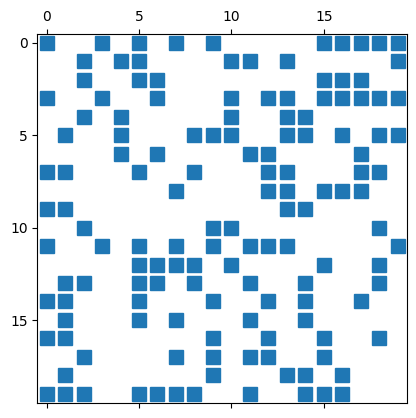

In [17]:
import matplotlib.pylab as plt
plt.spy(A)
plt.show()

In [18]:
print(D) #

[ 4 10 14  6  3  2  9 11  1  0 18  5 15 19 13 12 17 16  7  8]


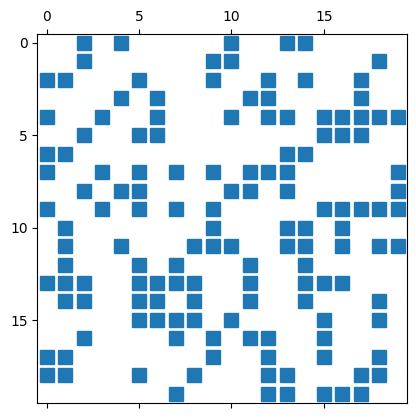

In [19]:
plt.spy(A[D]) #permuto la matrice in modo simmetrico
plt.show()

## Arrow matrix

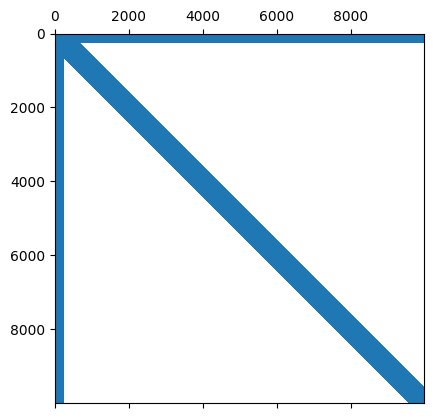

In [20]:
N=10000
A = sparse.lil_matrix((N,N))
A[0, :] = 100*np.random.rand(N)
A[1, :] = 200*np.random.rand(N)
A[:, 0:2] = A[0:2,:].T
A.setdiag(np.random.rand(N))
plt.spy(A)
plt.show()

In [21]:
A=A.tocsr()
D=sparse.csgraph.reverse_cuthill_mckee(A) # Array of permuted row and column indices.
print(D)

[9999 9998 9997 ...    1    0 4999]


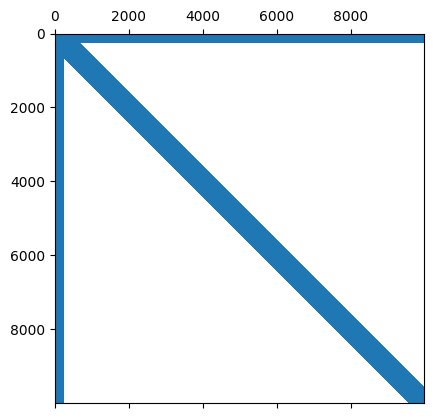

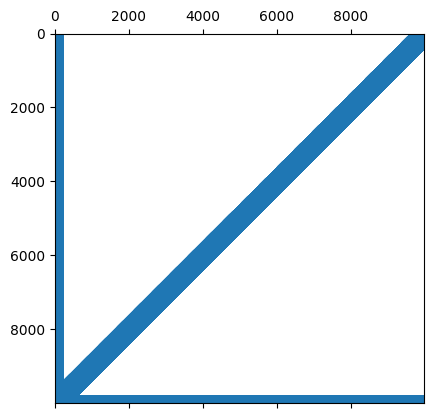

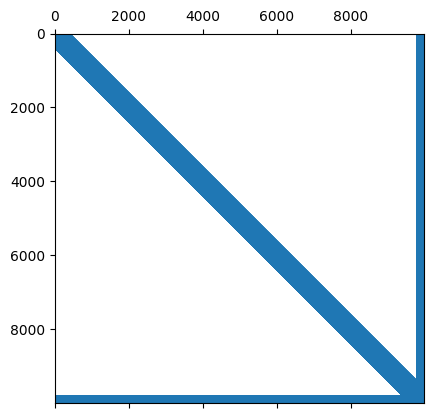

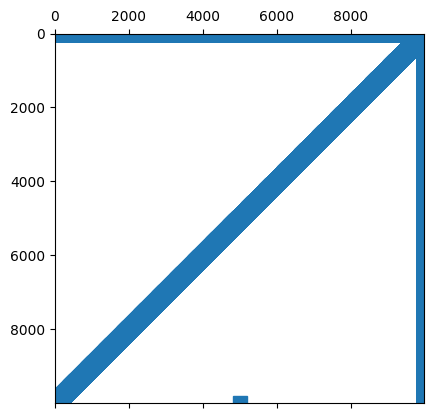

In [22]:
plt.spy(A)
plt.show()
B=(A[D,:]) #permuto per righe
plt.spy(B)
plt.show()
B=B[:,D] #perute per colonne
plt.spy(B)
plt.show()
C=B[D] #permuto righe e colonne
plt.spy(C)
plt.show()

In [23]:
b = np.random.rand(N)

In [24]:
import scipy as sp
import time
startT = time.time()
C=A.todense()
endT = time.time()
print('dense operation',endT-startT)
startT = time.time()
[p,l,u] = sp.linalg.lu(C)
endT = time.time()
print('factorization of the full system',endT-startT)
startT = time.time()
x = sp.linalg.solve(C,b)
endT = time.time()
print('solution of the full system',endT-startT)
startT = time.time()
x2 =  spla.spsolve(A, b)
endT = time.time()
print('solution of the sparse system A',endT-startT)
startT = time.time()
x3 =  spla.spsolve(B, b[D])
endT = time.time()
print('solution of the sparse system B',endT-startT)


dense operation 0.03138232231140137
factorization of the full system 26.241783380508423
solution of the full system 17.611352682113647
solution of the sparse system A 0.04212760925292969
solution of the sparse system B 0.025049924850463867


In [25]:
print(np.linalg.norm(x2-x3,1))
#c'è un grande errore tra le due soluzioni
print(np.linalg.norm(x2-x,1))
#poco errore -> con permutazione simmetrica non cambia molto
print(np.linalg.norm(x3-x,1))
#tanto errore
print(np.linalg.norm(x3-x,1)) #da correggere
#tanto errore


#è da correggere


#IN GENERALE. SE PERMUTO LA MATRICE BISOGNA PERMUTARE ANCHE IL VETTORE DEI TERMINI NOTI. IL RISULTATO VEDI TU

40872.09018047113


6.420821989735646e-11
40872.090180471125
40872.090180471125


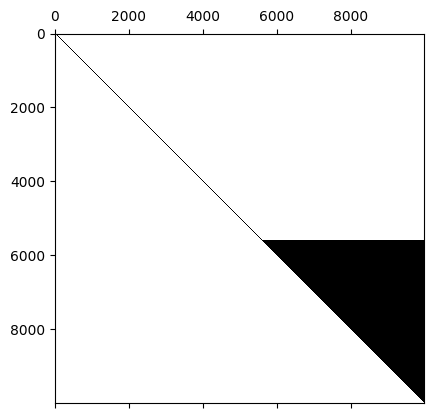

In [26]:
plt.spy(u)
plt.show()

#vedi il fill in

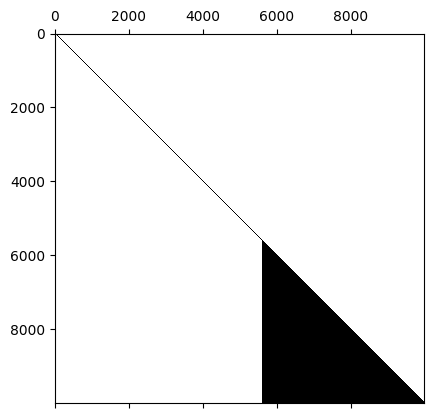

In [27]:
plt.spy(l)
plt.show()

#vedi il fill in

In [28]:
startT = time.time()
y1=A.dot(x)
endT = time.time()
print('sparse matrix vector product', endT-startT)
startT = time.time()
y2=np.dot(C,x)
endT = time.time()
print('full matrix vector product',endT-startT)
p=np.linalg.norm(y1-y2,1)/np.linalg.norm(y1,1)
print(p)

sparse matrix vector product 0.007999181747436523
full matrix vector product 0.0745840072631836
5.929088890690556e-14


In [80]:
sp.sparse.linalg.norm(A,np.inf)

1002947.8867130866

In [81]:
sp.sparse.linalg.norm(A,1)

1003095.7785966919

In [82]:
sp.sparse.linalg.norm(A,'fro')

18351.41774230073

In [83]:
sp.sparse.linalg.norm(A,2) # da non utilizzare per matrici sparse

12512.943697560948

In [29]:
# diagonals format 
#
diags = np.array([[1, 2, 3, 4,6,7,8,9]]).repeat(3, axis=0) #ripeti 3 volte la riga. Quindi avrò 3 righe uguali
print(diags,end="\n\n")
ioff = np.array([0, -2, 3])
DD =  sparse.dia_matrix((diags, ioff), shape=(8, 8)).toarray() #formato diagonale
print(DD)

#la matrice viene cosi perchè usa un formato per righe

[[1 2 3 4 6 7 8 9]
 [1 2 3 4 6 7 8 9]
 [1 2 3 4 6 7 8 9]]

[[1 0 0 4 0 0 0 0]
 [0 2 0 0 6 0 0 0]
 [1 0 3 0 0 7 0 0]
 [0 2 0 4 0 0 8 0]
 [0 0 3 0 6 0 0 9]
 [0 0 0 4 0 7 0 0]
 [0 0 0 0 6 0 8 0]
 [0 0 0 0 0 7 0 9]]


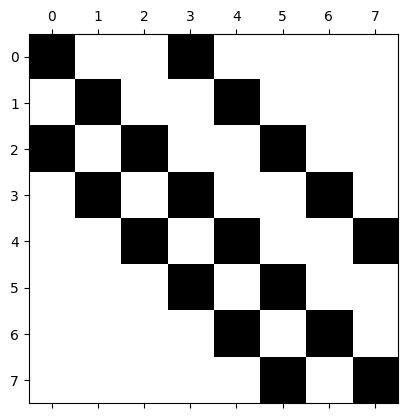

In [30]:
plt.spy(DD)
plt.show()

In [31]:
n=20
A = sparse.rand(n, n, density=0.15, format="csr", random_state=42)
u0 = sparse.rand(n, 1, density=0.35, format="csr", random_state=42)
u1 = A@u0
print( (u1.T@u0) )
#A = A + scipy.sparse.identity(n)
#A=A/A.sum(1)
#A.sum(1)


  (0, 0)	0.033852924831289315


In [32]:
def Met_PotenzeNorm(u0,A,tol,it_max):
    n_it = 0
    u1 = A@u0
    u1 = u1*(1/( np.linalg.norm((u1).todense())))   
    lam0 = u1.T@(A@u1)/(u1.T@u1)
    u0 = u1
    #Collezioniamo in una lista le varie approssimazioni di lambda
    approx = []   
    approx.append(lam0)
    
    #Usiamo anche un'altra lista per memorizzare le varie stime dell'errore
    err = []
    err.append(1)
    
    while((err[-1]>tol) & (n_it <it_max) ):
        u1 = A@u0
        u1 = u1*(1/( np.linalg.norm((u1).todense())))
        lam = u1.T@(A@u1)/(u1.T@u1)
        approx.append(np.asarray(lam))
        print
        err.append(abs(lam-lam0)/(1+abs(lam)))
        lam0 = lam
        u0 = u1
        n_it = n_it+1
        
    return lam,u0,n_it,err, approx

In [33]:
lam,u,n_it,err, approx = Met_PotenzeNorm(u0,A,1e-10,100)
print(lam)
print(err)
print('iterazioni',n_it)
print(np.linalg.norm( A@u - u*lam))

[[1.41418299]]
[1, matrix([[0.30237311]]), matrix([[0.04544586]]), matrix([[0.03596095]]), matrix([[0.01501557]]), matrix([[0.01561871]]), matrix([[0.00986377]]), matrix([[0.00251249]]), matrix([[0.00333134]]), matrix([[0.00124935]]), matrix([[0.00083357]]), matrix([[0.00035706]]), matrix([[0.00031591]]), matrix([[0.00011237]]), matrix([[8.46478047e-05]]), matrix([[4.16149201e-05]]), matrix([[2.72645112e-05]]), matrix([[1.17022505e-05]]), matrix([[8.51825189e-06]]), matrix([[4.10106223e-06]]), matrix([[2.48613335e-06]]), matrix([[1.26662547e-06]]), matrix([[8.16130561e-07]]), matrix([[3.97826041e-07]]), matrix([[2.43474762e-07]]), matrix([[1.30072182e-07]]), matrix([[7.67866848e-08]]), matrix([[3.97846892e-08]]), matrix([[2.40464101e-08]]), matrix([[1.28254926e-08]]), matrix([[7.38436363e-09]]), matrix([[4.01014323e-09]]), matrix([[2.34203882e-09]]), matrix([[1.25822119e-09]]), matrix([[7.24165751e-10]]), matrix([[3.98922839e-10]]), matrix([[2.27264282e-10]]), matrix([[1.24332242e-10]]

In [34]:
vals, vecs= sp.sparse.linalg.eigs(A,k=1)
print(vals,lam) #se mette +0j + perch+ eigs restituisce un complesso
print(vecs/np.max(np.max(np.real(vecs)))) #eigs potrebbe trovare un autovettore diverso perchè non è detto che sia unico (a meno di scalamento), quindi se scalo per il massimo posso confrontare
print(u/np.max(np.max(u))) #stesso ragionamento

[1.41418299+0.j] [[1.41418299]]
[[ 4.66644474e-01+0.j]
 [ 1.00000000e+00+0.j]
 [ 5.72175458e-02+0.j]
 [ 1.25791140e-01+0.j]
 [ 6.17476925e-01+0.j]
 [ 4.05406383e-01+0.j]
 [-1.92738954e-16+0.j]
 [ 1.17377511e-01+0.j]
 [ 2.61062388e-02+0.j]
 [ 5.65244347e-01+0.j]
 [ 4.89016150e-01+0.j]
 [ 3.35066395e-01+0.j]
 [-3.13897608e-17+0.j]
 [ 7.68202774e-01+0.j]
 [ 8.96022662e-02+0.j]
 [-1.30001705e-16+0.j]
 [ 9.17604998e-01+0.j]
 [ 1.38323792e-02+0.j]
 [ 6.84054764e-01+0.j]
 [ 6.53395127e-01+0.j]]
  (0, 0)	0.4666444739983305
  (1, 0)	1.0
  (2, 0)	0.057217545790504545
  (3, 0)	0.1257911400033782
  (4, 0)	0.6174769248407208
  (5, 0)	0.4054063834985711
  (7, 0)	0.11737751099377908
  (8, 0)	0.026106238768431385
  (9, 0)	0.5652443469028425
  (10, 0)	0.48901615018205075
  (11, 0)	0.33506639539770455
  (13, 0)	0.768202774782856
  (14, 0)	0.08960226626304267
  (16, 0)	0.9176049979636806
  (17, 0)	0.013832379244959388
  (18, 0)	0.6840547639792591
  (19, 0)	0.6533951270996808


In [35]:
print(vecs)
print(u)

[[ 2.12925154e-01+0.j]
 [ 4.56289887e-01+0.j]
 [ 2.61077875e-02+0.j]
 [ 5.73972251e-02+0.j]
 [ 2.81748476e-01+0.j]
 [ 1.84982833e-01+0.j]
 [-8.79448354e-17+0.j]
 [ 5.35581712e-02+0.j]
 [ 1.19120127e-02+0.j]
 [ 2.57915279e-01+0.j]
 [ 2.23133124e-01+0.j]
 [ 1.52887408e-01+0.j]
 [-1.43228304e-17+0.j]
 [ 3.50523157e-01+0.j]
 [ 4.08846079e-02+0.j]
 [-5.93184633e-17+0.j]
 [ 4.18693881e-01+0.j]
 [ 6.31157476e-03+0.j]
 [ 3.12127271e-01+0.j]
 [ 2.98137589e-01+0.j]]
  (0, 0)	0.21292515431540035
  (1, 0)	0.4562898870118457
  (2, 0)	0.026107787503844425
  (3, 0)	0.0573972250592327
  (4, 0)	0.28174847626799443
  (5, 0)	0.18498283292044398
  (7, 0)	0.05355817122908313
  (8, 0)	0.01191201273795182
  (9, 0)	0.2579152791823825
  (10, 0)	0.22313312391353568
  (11, 0)	0.15288740769748502
  (13, 0)	0.3505231573078557
  (14, 0)	0.04088460794916905
  (16, 0)	0.41869388084235265
  (17, 0)	0.006311574762787518
  (18, 0)	0.3121272709660109
  (19, 0)	0.2981375887184039


In [ ]:
n=20
A = sparse.rand(n, n, density=0.15, format="csr", random_state=42)
u0 = sparse.rand(n, 1, density=0.35, format="csr", random_state=42)
u1 = A@u0
print( (u1.T@u0) )
A = A # + scipy.sparse.identity(n)
A=A/np.max(A.sum(1),1)
A.sum(1)